##### Python libraries

In [1]:
import pandas as pd
import numpy as np

###### Visualization Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

###### ML Libraries

In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

###### Importing the train and test csv files using pandas

In [4]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')

In [5]:
train.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,...,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,...,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,...,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,...,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,...,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


######  Checking for any null or missing values and also datatypes

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284455 entries, 0 to 284454
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   284455 non-null  int64  
 1   V1      284455 non-null  float64
 2   V2      284455 non-null  float64
 3   V3      284455 non-null  float64
 4   V4      284455 non-null  float64
 5   V5      284455 non-null  float64
 6   V6      284455 non-null  float64
 7   V7      284455 non-null  float64
 8   V8      284455 non-null  float64
 9   V9      284455 non-null  float64
 10  V10     284455 non-null  float64
 11  V11     284455 non-null  float64
 12  V12     284455 non-null  float64
 13  V13     284455 non-null  float64
 14  V14     284455 non-null  float64
 15  V15     284455 non-null  float64
 16  V16     284455 non-null  float64
 17  V17     284455 non-null  float64
 18  V18     284455 non-null  float64
 19  V19     284455 non-null  float64
 20  V20     284455 non-null  float64
 21  V21     28

In [7]:
train.isnull().sum()

Index     0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###### Dropping index column as it is unnecessary for our analysis

In [8]:
train.drop('Index',axis = 1, inplace = True)
test.drop('Index',axis = 1, inplace = True)

###### Checking the balance of the 2 Classes of fraud and not fraud

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


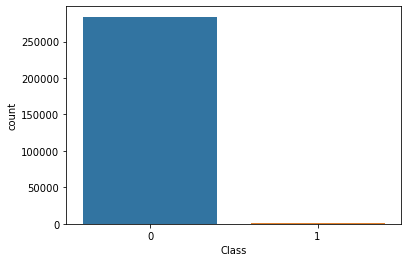

In [9]:
sns.countplot(train['Class'])
plt.show()

###### High disbalance found.

###### Let us balance the dataset

In [227]:
fraud = train[train['Class']==1]
nofraud = train[train['Class']!=1].sample(560,random_state = 3435)
data = pd.DataFrame(np.vstack((fraud,nofraud)),columns = train.columns)

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


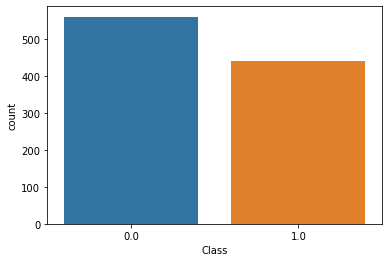

In [228]:
sns.countplot(data['Class'])
plt.show()

In [229]:
data['Class'].value_counts(normalize = True)

0.0    0.56
1.0    0.44
Name: Class, dtype: float64

# Univariate Analysis

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


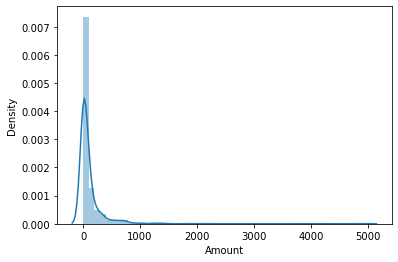

8.945721537415936
138.91686559879284
The amount column seems to be positively skewed with a lighter tail. Let us apply squareroot or log transformation on this column. THis will probably get resolved when we apply StandardScaler to the entire dataset


In [230]:
#Checking the skew of the amount column
sns.distplot(data['Amount'])
plt.show()
print(data['Amount'].skew())
print(data['Amount'].kurt())
print('The amount column seems to be positively skewed with a lighter tail. Let us apply squareroot or log transformation on this column. THis will probably get resolved when we apply StandardScaler to the entire dataset')

# Bivariate analysis

###### Checking for multicollinearity in the data

In [231]:
# plt.figure(figsize = (25,10))
# sns.heatmap(data.corr(),annot = True)
# plt.show()

<img src = "img/corrheatmap.png">

In [232]:
# col_check = data.loc[:,'V1':'V18']
# sns.pairplot(col_check)

<img src = "img/correlated pairplot.png">

**As suspected the variables that were correlated in the above heatmap show liner curves in the pairplot created.**

#### Let us first try to create a logistic regression model with all the features.

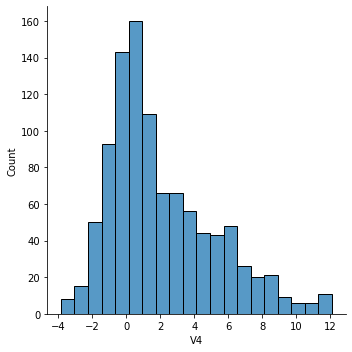

In [233]:
sns.displot(data['V4'])

All the data seems to have some amount of skewness and is not normally distributed. Lets apply the statndard sacaler which will impute z-scores and standardize the dataset.

In [234]:
ss = StandardScaler()
X = data.drop('Class',axis = 1)
X_Scaled = ss.fit_transform(X)
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size = 0.2,random_state = 245)

In [235]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 29), (200, 29), (800,), (200,))

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


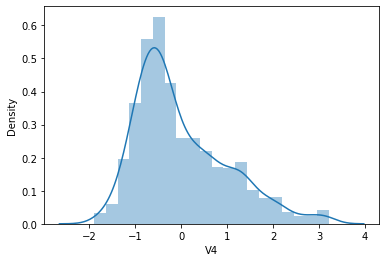

In [236]:
d = pd.DataFrame(X_Scaled,columns = X.columns)
sns.distplot(d['V4'])
plt.show()

Post the standard Scaler all the data is standardized now with a mean of 0 and SD of 1

###### Logistic Regression

In [237]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [238]:
lr.score(x_test,y_test)

0.935

Precision: 0.8974358974358975
Recall: 0.9905660377358491


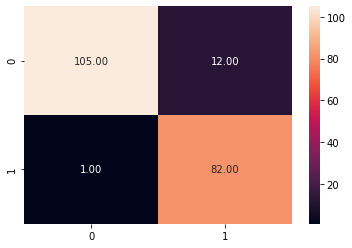

In [239]:
y_pred = lr.predict(x_test)
cmatrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cmatrix,annot = True,fmt = '.2f')
prec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
recal = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[1][0])
print('Precision: {}'.format(prec))
print('Recall: {}'.format(recal))

###### We have good recall which means we have lesser false positives. This is a good thing in case of credit card fraud. This means that our model is more likely to classify a person as fraud even if he is not than not classify a person as fraud who is going to commit fraud.

# Let us create the same model, this time without the correlated variables

In [240]:
col_check = data.loc[:,'V4':'V18']

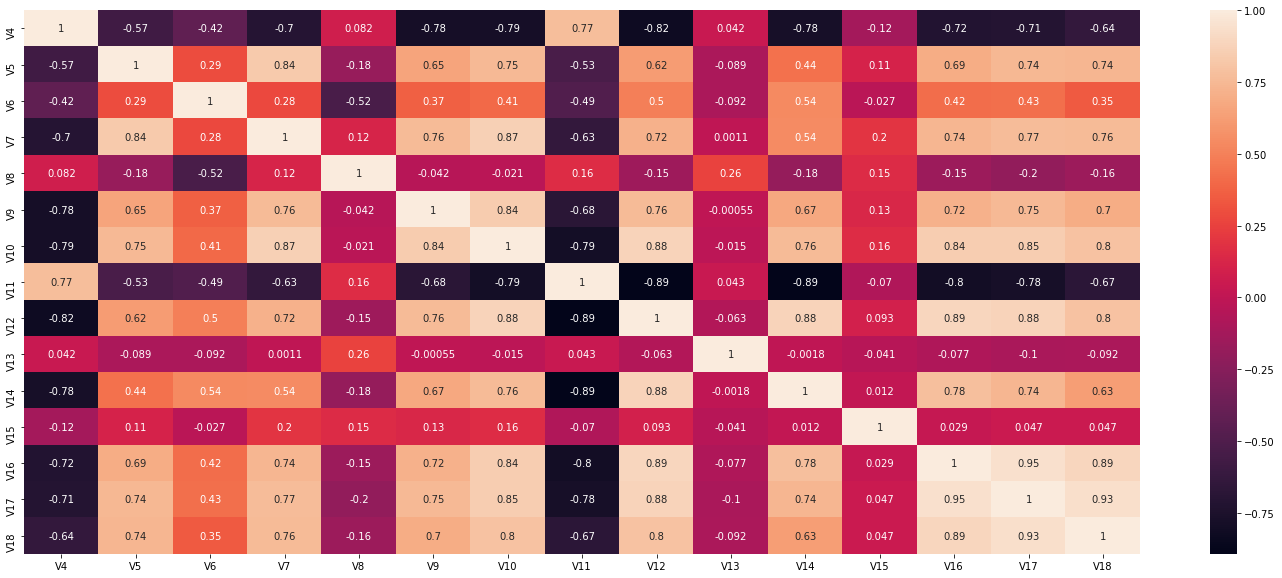

In [241]:
plt.figure(figsize = (25,10))
sns.heatmap(col_check.corr(),annot = True)
plt.show()

In [242]:
drop_columns = ['V16', 'V17', 'V18','V14','V9', 'V10', 'V11','V12','V5', 'V6', 'V7','V3','V1','Class']
drop_in_test = ['V16', 'V17', 'V18','V14','V9', 'V10', 'V11','V12','V5', 'V6', 'V7','V3','V1']

In [243]:
ss = StandardScaler()
X = data.drop(drop_columns,axis = 1)
X_Scaled = ss.fit_transform(X)
X_test = test.drop(drop_in_test,axis = 1)
X_test_Scaled = ss.fit_transform(test)
y = data['Class']
X_train,X_test,Y_train,Y_test = train_test_split(X_Scaled,y,test_size = 0.2,random_state = 245)

In [244]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((800, 16), (200, 16), (800,), (200,))

In [245]:
lr1 = LogisticRegression()
lr1.fit(X_train,Y_train)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [246]:
lr1.score(X_test,Y_test)

0.9

Precision: 0.864406779661017
Recall: 0.9622641509433962


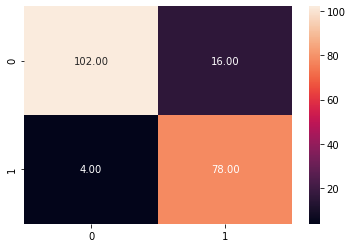

In [247]:
Y_pred = lr1.predict(X_test)
cmatrix = confusion_matrix(Y_pred,Y_test)
sns.heatmap(cmatrix,annot = True,fmt = '.2f')
prec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
recal = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[1][0])
print('Precision: {}'.format(prec))
print('Recall: {}'.format(recal))

###### Dropping the columns seems to make the model perform worse. Maybe those features are infact playing a significant role in classifying fraud customers from non-fraud customers.

###### Lets make predictions using our 1st logistic regression model since it does much better than the second one. 

In [248]:
test_scaled = ss.fit_transform(test)
pred = lr.predict(test_scaled)
subm = pd.DataFrame(pred,columns = ['Class'])
subm['Class'] = subm['Class'].astype(int) 
subm.to_csv('submissions/submissionlog.csv',index= True,index_label = 'Index')

# Now we should try using the KNN classifier using our train data

In [249]:
ss = StandardScaler()
X = data.drop('Class',axis = 1)
X_Scaled = ss.fit_transform(X)
X_test_Scaled = ss.fit_transform(test)
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size = 0.2,random_state = 245)

In [250]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 29), (200, 29), (800,), (200,))

In [251]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [252]:
knn.score(x_test,y_test)

0.92

# Let us try to find the best parameter for knn

In [253]:
grid_param = {
    'leaf_size': [10,20,30,40],
    'n_neighbors': [2,3,4,5,6,7,8,9,10],
    'p': [1,2]
    
}
grid_search = GridSearchCV(estimator = knn,param_grid = grid_param,cv = 5,n_jobs = -1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [254]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'leaf_size': 10, 'n_neighbors': 7, 'p': 1}


In [255]:
knn = KNeighborsClassifier(n_neighbors = 7,p = 1,leaf_size = 10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.925

Precision: 0.8760330578512396
Recall: 1.0


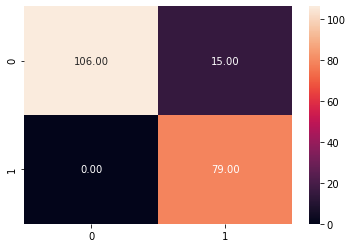

In [256]:
y_pred = knn.predict(x_test)
cmatrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cmatrix,annot = True,fmt = '.2f')
prec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
recal = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[1][0])
print('Precision: {}'.format(prec))
print('Recall: {}'.format(recal))

In [257]:
test_scaled = ss.fit_transform(test)
pred = knn.predict(test_scaled)
subm = pd.DataFrame(pred,columns = ['Class'])
subm['Class'] = subm['Class'].astype(int) 
subm.to_csv('submissions/submissionKNN.csv',index= True,index_label = 'Index')

# Currently logistic regression seems to be doing much better than KNN. Let us try to apply a Decision Tree Classifier here on this data.

In [258]:
ss = StandardScaler()
X = data.drop('Class',axis = 1)
X_Scaled = ss.fit_transform(X)
X_test_Scaled = ss.fit_transform(test)
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size = 0.2,random_state = 245)

In [259]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 29), (200, 29), (800,), (200,))

In [260]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [261]:
dtree.score(x_test,y_test)

0.9

Precision: 0.8909090909090909
Recall: 0.9245283018867925


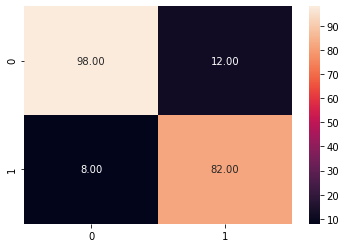

In [262]:
y_pred = dtree.predict(x_test)
cmatrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cmatrix,annot = True,fmt = '.2f')
prec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
recal = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[1][0])
print('Precision: {}'.format(prec))
print('Recall: {}'.format(recal))

##### Finding the best parameters

In [263]:
# grid_param = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth' : range(2,32,1),
#     'min_samples_leaf' : range(1,10,1),
#     'min_samples_split': range(2,10,1),
#     'splitter' : ['best', 'random']
    
# }
# grid_search = GridSearchCV(estimator = dtree,param_grid = grid_param,cv = 5,n_jobs = -1)
# grid_search.fit(x_train,y_train)

In [264]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'leaf_size': 10, 'n_neighbors': 7, 'p': 1}


In [265]:
dtree = DecisionTreeClassifier(criterion = 'gini',max_depth = 6,min_samples_leaf = 5 ,min_samples_split = 6, splitter = 'random')
dtree.fit(x_train,y_train)
dtree.score(x_test,y_test)

0.92

Precision: 0.875
Recall: 0.9905660377358491


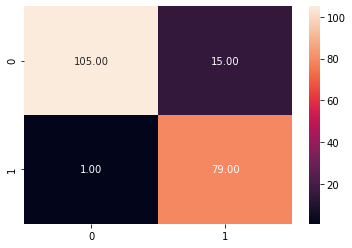

In [266]:
y_pred = dtree.predict(x_test)
cmatrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cmatrix,annot = True,fmt = '.2f')
prec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
recal = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[1][0])
print('Precision: {}'.format(prec))
print('Recall: {}'.format(recal))

In [267]:
test_scaled = ss.fit_transform(test)
pred = dtree.predict(test_scaled)
subm = pd.DataFrame(pred,columns = ['Class'])
subm['Class'] = subm['Class'].astype(int) 
subm.to_csv('submissions/submissiondtree.csv',index= True,index_label = 'Index')

# Let us try boosting

In [268]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [269]:
ss = StandardScaler()
X = data.drop('Class',axis = 1)
X_Scaled = ss.fit_transform(X)
X_test_Scaled = ss.fit_transform(test)
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size = 0.2,random_state = 245)

In [270]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 29), (200, 29), (800,), (200,))

In [271]:
x = XGBClassifier(objective='binary:logistic')
x.fit(x_train,y_train)

C:\Users\tejas\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [272]:
y_pred1 = x.predict(x_train)
predictions = [round(value) for value in y_pred1]
accuracy = accuracy_score(y_train,predictions)
accuracy

1.0

In [273]:
y_pred1 = x.predict(x_test)
predictions = [round(value) for value in y_pred1]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.935

Precision: 0.8974358974358975
Recall: 0.9905660377358491


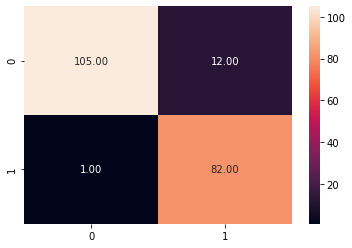

In [274]:
y_pred = x.predict(x_test)
cmatrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cmatrix,annot = True,fmt = '.2f')
prec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
recal = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[1][0])
print('Precision: {}'.format(prec))
print('Recall: {}'.format(recal))

In [275]:
test_scaled = ss.fit_transform(test)
pred = x.predict(test_scaled)
subm = pd.DataFrame(pred,columns = ['Class'])
subm['Class'] = subm['Class'].astype(int) 
subm.to_csv('submissions/submissionxgb1.csv',index= True,index_label = 'Index')

###### Now to try to increase the accuracy of the model, we'll do hyperparameter tuning using grid search

In [276]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [277]:
# grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid = param_grid,cv = 10,n_jobs = -1, verbose=3)
# grid.fit(x_train,y_train)

In [278]:
# grid.best_params_
print("{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}")

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}


In [279]:
x = XGBClassifier(objective='binary:logistic',learning_rate = 1,max_depth = 3,n_estimators = 200)
x.fit(x_train,y_train)

[08:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\tejas\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [280]:
y_pred1 = x.predict(x_train)
predictions = [round(value) for value in y_pred1]
accuracy = accuracy_score(y_train,predictions)
accuracy

1.0

In [281]:
y_pred1 = x.predict(x_test)
predictions = [round(value) for value in y_pred1]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.92

Precision: 0.8813559322033898
Recall: 0.9811320754716981


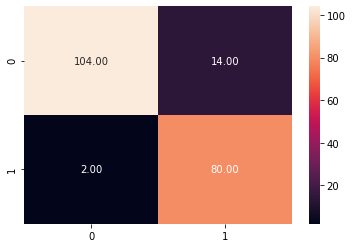

In [282]:
y_pred = x.predict(x_test)
cmatrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cmatrix,annot = True,fmt = '.2f')
prec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
recal = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[1][0])
print('Precision: {}'.format(prec))
print('Recall: {}'.format(recal))

In [283]:
test_scaled = ss.fit_transform(test)
pred = x.predict(test_scaled)
subm = pd.DataFrame(pred,columns = ['Class'])
subm['Class'] = subm['Class'].astype(int) 
subm.to_csv('submissions/submissionxgb2.csv',index= True,index_label = 'Index')

###### Boosting has given us the best overall recall till now.

# Bagging

In [287]:
ss = StandardScaler()
X = data.drop('Class',axis = 1)
X_Scaled = ss.fit_transform(X)
X_test_Scaled = ss.fit_transform(test)
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size = 0.2,random_state = 245)

In [288]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 29), (200, 29), (800,), (200,))

In [289]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 1,p = 1,leaf_size = 10),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True) 

In [290]:
bag_knn.fit(x_train, y_train)
bag_knn.score(x_test, y_test)

0.925

Precision: 0.8760330578512396
Recall: 1.0


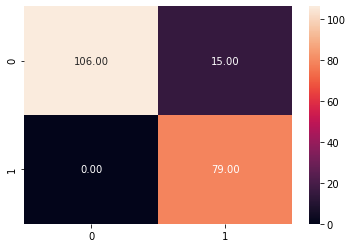

In [291]:
y_pred = bag_knn.predict(x_test)
cmatrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cmatrix,annot = True,fmt = '.2f')
prec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
recal = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[1][0])
print('Precision: {}'.format(prec))
print('Recall: {}'.format(recal))

In [292]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 1,p = 1,leaf_size = 10),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=False, random_state=3)

In [293]:
pasting_knn.fit(x_train, y_train)
pasting_knn.score(x_test, y_test)

0.92

Precision: 0.8879310344827587
Recall: 0.9716981132075472


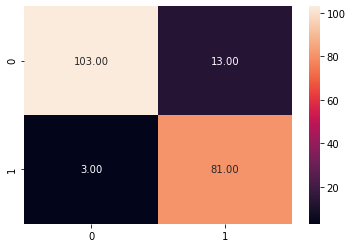

In [294]:
y_pred = pasting_knn.predict(x_test)
cmatrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cmatrix,annot = True,fmt = '.2f')
prec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
recal = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[1][0])
print('Precision: {}'.format(prec))
print('Recall: {}'.format(recal))

In [95]:
test_scaled = ss.fit_transform(test)
pred = bag_knn.predict(test_scaled)
subm = pd.DataFrame(pred,columns = ['Class'])
subm['Class'] = subm['Class'].astype(int) 
subm.to_csv('submissions/submissionbag_knn.csv',index= True,index_label = 'Index')

# Random Forest

In [228]:
ss = StandardScaler()
X = data.drop('Class',axis = 1)
X_Scaled = ss.fit_transform(X)
X_test_Scaled = ss.fit_transform(test)
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size = 0.2,random_state = 245)

In [229]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 29), (200, 29), (800,), (200,))

In [230]:
rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(x_train,y_train)
rand_clf.score(x_test,y_test)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.935

Precision: 0.8813559322033898
Recall: 0.9811320754716981


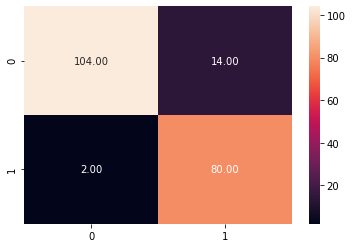

In [231]:
y_pred = x.predict(x_test)
cmatrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cmatrix,annot = True,fmt = '.2f')
prec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
recal = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[1][0])
print('Precision: {}'.format(prec))
print('Recall: {}'.format(recal))

In [232]:
grid_param = {
    "n_estimators" : [90,100,115,120],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [4,5,6,7,8,9,10],
    'max_features' : ['auto','log2']
}

In [234]:
# grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
# grid_search.fit(x_train,y_train)

In [235]:
grid_search.best_params_
#print("")

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [236]:
rand_clf = RandomForestClassifier(criterion= 'gini',
 max_features = 'auto',
 min_samples_leaf = 2,
 min_samples_split= 4,
 n_estimators = 100,random_state=6)

In [237]:
rand_clf.fit(x_train,y_train)
rand_clf.score(x_test,y_test)

0.935

Precision: 0.8813559322033898
Recall: 0.9811320754716981


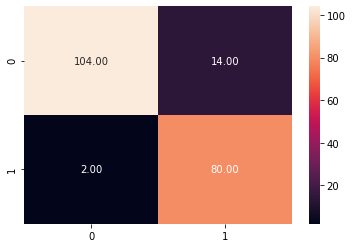

In [238]:
y_pred = x.predict(x_test)
cmatrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cmatrix,annot = True,fmt = '.2f')
prec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
recal = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[1][0])
print('Precision: {}'.format(prec))
print('Recall: {}'.format(recal))

In [226]:
test_scaled = ss.fit_transform(test)
pred = rand_clf.predict(test_scaled)
subm = pd.DataFrame(pred,columns = ['Class'])
subm['Class'] = subm['Class'].astype(int) 
subm.to_csv('submissions/submissionrand_for.csv',index= True,index_label = 'Index')

# Stacking

In [191]:
ss = StandardScaler()
X = data.drop('Class',axis = 1)
X_Scaled = ss.fit_transform(X)
X_test_Scaled = ss.fit_transform(test)
y = data['Class']
train,val_train,testy,val_test = train_test_split(X_Scaled,y,test_size = 0.5,random_state = 245)

In [192]:
x_train,x_test,y_train,y_test = train_test_split(train,testy,test_size = 0.2,random_state = 245)

In [193]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 29), (100, 29), (400,), (100,))

In [194]:
knn = KNeighborsClassifier(n_neighbors = 1,p = 1,leaf_size = 10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.97

In [196]:
bag_knn1 = BaggingClassifier(KNeighborsClassifier(n_neighbors = 1,p = 1,leaf_size = 10),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True) 
bag_knn1.fit(x_train,y_train)
bag_knn1.score(x_test,y_test)

0.98

In [197]:
predict_val1 = knn.predict(val_train)
predict_val2 = bag_knn1.predict(val_train)
predict_val = np.column_stack((predict_val1,predict_val2))
predict_val

array([[0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.

In [199]:
predict_test1 = knn.predict(x_test)
predict_test2 = bag_knn1.predict(x_test)

In [200]:
predict_test = np.column_stack((predict_test1,predict_test2))
predict_test

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [201]:
rand_clf = RandomForestClassifier()

rand_clf.fit(predict_val,val_test)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [202]:
rand_clf.score(predict_test,y_test)

0.97

In [205]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [206]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [207]:
grid_search.fit(predict_val,val_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [208]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 90}

In [211]:
rand_clf1 = RandomForestClassifier( criterion='gini',max_features = 'auto',min_samples_leaf =1,min_samples_split= 4,n_estimators =90)

In [212]:
rand_clf.fit(predict_val,val_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [213]:
rand_clf.score(predict_test,y_test)

0.97

###### Converting our test set into above format

In [215]:
test_scaled = ss.fit_transform(test)
final1 = knn.predict(test_scaled)
final2 = svm.predict(test_scaled)
predict_test = np.column_stack((final1,final2))
pred = rand_clf.predict(predict_test)
subm = pd.DataFrame(pred,columns = ['Class'])
subm['Class'] = subm['Class'].astype(int) 
subm.to_csv('submissions/submissionstackingbagknnrf.csv',index= True,index_label = 'Index')